# RNN (Recurrent neural networks)

A RNN can be visualized as a neural network with layers arranged vertically. Each layer represents a moment in time. An arrow connects each layer to the layer that follows, symbolizing the passage of information from one time step to the other. Another arrow enters and exits each layer, indicating the inputs and outputs at each moment.

Let’s also say you want to predict the direction that the ball was moving. So with only the information that you see on the screen, how would you do this? If you record many snapshots of the ball’s position in succession, you will have enough information to make a better prediction.


![ball](../asset/ball.gif "segment")

So to be short RNN can help to add memory into a sequence, like a ball know how the ball is moving

## In Text

In text is the same. A text is just a sequence of words

So RNN will help to learn more relationship between words

## Memory

Recurrent Neural Networks (RNNs) excel in processing sequence data and making predictions thanks to their trait I call 'sequential memory'. To gain a visceral understanding of what sequential memory entails, consider this analogy:

Visualize yourself reciting the alphabet:


A B C D E F G H I J K L M N O P Q R S T U V W X Y Z


Quite facile, wasn't it? It comes naturally because this specific sequence is ingrained in your memory from a young age.

Now, attempt to recite the alphabet backward:


Z Y X W V U T S R Q P O N M L K J I H G F E D C B A


This task is decidedly more challenging, unless you've undergone explicit practice. The sequence is unfamiliar, hence it's more difficult to recite.
Let's try another exercise. Begin at the letter 'F':


F...


Although the initial few letters might be a struggle, as soon as your brain identifies the pattern, the rest will follow effortlessly.

The rationale behind this challenge lies very much in the learning process. You're taught the alphabet as a sequence. Your brain uses sequential memory as a tool for recognizing sequence patterns more efficiently, making familiar sequences easier to recall.

The same principle applies to RNNs. Their sequential memory enables them to understand and predict patterns within sequential data.

## Recurrent Neural Networks

RNNs encapsulate the abstract concept of sequential memory in their operation. But how exactly does an RNN manifest this idea? To understand this, we need to examine a conventional neural network, also known as a feed-forward neural network. Such a network is composed of an input layer, a hidden layer, and an output layer.

![fdd](../asset/Feed_forward_neural_net.gif "segment")

How do we get a feed-forward neural network to be able to use previous information to effect later ones? What if we add a loop in the neural network that can pass prior information forward?


<img src="../asset/Feed_forward_rnn.gif" alt="image" width="auto" height="500">


Here an other representation of the full iteration in sequence

<img src="../asset/rnn_struct.png" alt="image" width="auto" height="300">

### Example

Lets take the sentence: "what time is it?"

**1**

Split into sequence (tokens)

![01](../asset/rnn01.gif "segment")

**2**

Feed “What” into the RNN. The RNN encodes “What” and produces an output.

![02](../asset/rnn02.gif "segment")

**3**

For the next step, we feed the word “time” and the hidden state from the previous step. The RNN now has information on both the word “What” and “time.”

![03](../asset/rnn03.gif "segment")

**4**

We repeat this process, until the final step. You can see by the final step the RNN has encoded information from all the words in previous steps.

![04](../asset/rnn04.gif "segment")

**5**

Since the final output was created from the rest of the sequence, we should be able to take the final output and pass it to the feed-forward layer to classify an intent.

![05](../asset/rnn05.gif "segment")

### Pseudo code

```python
rnn = RNN()
ff = FeedForwardNN()
hidden_state = [0.0, 0.0, 0.0, 0.0]
for word in sentence:
    output, hidden_state = rnn(word, hidden_state)
preduction = ff(output)
```

### Vanishing Gradient

The "vanishing gradient" problem in RNNs refers to the situation where the gradients of the loss function become so small during backpropagation that the weights of the network are barely updated, especially for the earlier layers. This happens because the gradient values, which are less than 1, are multiplied together multiple times during backpropagation through time, causing them to diminish exponentially. As a result, the network has difficulty learning and capturing long-range dependencies in the data.

![rnn gradiant](../asset/rnn_gradiant.png)

## Summary

**Advantages:**

1. **Sequential Processing:** RNNs are inherently designed for sequential data processing, making them perfect for time series prediction, natural language processing, and speech recognition.
2. **low cost inference:** RNNs tend to require fewer computational resources than Transformer models as they process input sequences step by step rather than in parallel.

**Disadvantages:**

1. **Vanishing and Exploding Gradient Problem:** During back-propagation in deep RNNs, gradients are multiplied by the weight matrix at every timestep. This can result in gradients that either explode or vanish, making it challenging to train deep RNNs.
2. **Long-term Dependencies:** RNNs struggle to learn long-term dependencies due to the vanishing gradient problem.
3. **Cannot Process in Parallel:** The sequential nature of RNNs means they cannot take advantage of modern GPUs which excel in performing parallel operations.

# RNN in python

We will be building and training a basic character-level Recurrent Neural Network (RNN) to classify words.

Specifically, we’ll train on a few thousand surnames from 18 languages of origin, and predict which language a name is from based on the spelling:

## Preparing the Data

In [2]:
import glob
import os
import string
import unicodedata
from io import open


def findFiles(path):
    return glob.glob(path)


all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)


# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )


# Read a file and split into lines
def readLines(filename):
    """
    Reads the contents of a file and returns them as a list of lines.

    :param filename: The name of the file to be read.
    :return: A list of lines read from the file.
    """
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]


# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

for filename in findFiles('../dataset/names/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

print("findFiles", findFiles('../dataset/names/names/*.txt'))
print("unicodeToAscii", unicodeToAscii('Ślusàrski'))

findFiles ['../dataset/names/names/Scottish.txt', '../dataset/names/names/Dutch.txt', '../dataset/names/names/Italian.txt', '../dataset/names/names/Irish.txt', '../dataset/names/names/Arabic.txt', '../dataset/names/names/Polish.txt', '../dataset/names/names/German.txt', '../dataset/names/names/Japanese.txt', '../dataset/names/names/Korean.txt', '../dataset/names/names/English.txt', '../dataset/names/names/Greek.txt', '../dataset/names/names/Vietnamese.txt', '../dataset/names/names/Czech.txt', '../dataset/names/names/Chinese.txt', '../dataset/names/names/Spanish.txt', '../dataset/names/names/Portuguese.txt', '../dataset/names/names/Russian.txt', '../dataset/names/names/French.txt']
unicodeToAscii Slusarski


Now we have **category_lines**, a dictionary mapping each category (language) to a list of lines (names). We also kept track of **all_categories** (just a list of languages) and **n_categories** for later reference.

In [3]:
print(category_lines['Italian'][:5])
print("Number of categories:", n_categories)
print("Number of letters:", n_letters)

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']
Number of categories: 18
Number of letters: 57


## Turning Names into tokens

Has we see in previous tutorials we will need to convert letters into tensor (vectors) with embedding layer.

So we need to convert letter into ids

In [4]:
letter_to_id = {l: i for i, l in enumerate(all_letters)}
id_to_letter = {i: l for i, l in enumerate(all_letters)}
print(letter_to_id)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, 'A': 26, 'B': 27, 'C': 28, 'D': 29, 'E': 30, 'F': 31, 'G': 32, 'H': 33, 'I': 34, 'J': 35, 'K': 36, 'L': 37, 'M': 38, 'N': 39, 'O': 40, 'P': 41, 'Q': 42, 'R': 43, 'S': 44, 'T': 45, 'U': 46, 'V': 47, 'W': 48, 'X': 49, 'Y': 50, 'Z': 51, ' ': 52, '.': 53, ',': 54, ';': 55, "'": 56}


In [5]:
def tokenizer(text: str):
    """
    Tokenizes the input text.

    :param text: The input text to be tokenized.
    :return: A list of token IDs corresponding to each letter in the input text.
    """
    return [letter_to_id[letter] for letter in text]


tokenizer('Bob')

[27, 14, 1]

## Creating the Network

To keep this examples simple we want use batch `[batch size, seq len]`.

But pass throw the model only one sequence (one name)


In [76]:
import torch.nn as nn
import torch


class RNN(nn.Module):
    def __init__(self, vocab_size, hidden_size, output_size):
        """
        :param vocab_size: Size of the vocabulary
        :param hidden_size: Size of the hidden layers and embedding layer
        :param output_size: number of classes in the dataset
        """
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(vocab_size, hidden_size)

        # output embedding size + hidden_size
        self.i2h = nn.Linear(hidden_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)

    def forward(self, input_ids, hidden=None):
        """
        :param input_ids: Array of toke ids [seq_len]
        :param hidden: (optional) hidden state of previous layer
        :return: tuple predicted output [output_size] and hidden state [hidden_size]
        """
        # [seq_len, emb dim]
        embedding = self.embedding(input_ids)
        # [hidden_size]
        hidden = self.initHidden() if hidden is None else hidden
        for i in range(embedding.shape[0]):
            # Add hidden into the embedding last dimension
            # [emb dim + emb dim]
            combined = torch.cat((embedding[i], hidden), 0)
            hidden = self.i2h(combined) 
            # The tanh function is a popular choice because it maps its inputs to outputs in the range between
            # -1 and 1, maintaining a zero center, and so it helps in reducing the leaning towards extreme predictions.
            # This property helps in controlling the exploding gradients problem in the context of RNNs.
            hidden = torch.tanh(hidden)
            output = self.h2o(hidden)
        # Expand 1 dim for the loss function
        return output.unsqueeze(0), hidden

    def initHidden(self):
        return torch.zeros(self.hidden_size, requires_grad=False)

In [63]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

# 1-Tokenize the text
tokens = torch.tensor(tokenizer('Bob'))
print("tokens", tokens.shape)

# 2- Creat the first hidden state
hidden = torch.zeros(n_hidden)

# 3- Pass throw the rnn network
output, next_hidden = rnn(tokens, hidden)
print("next_hidden", next_hidden.shape)
print("output", output.shape)

tokens torch.Size([3])
next_hidden torch.Size([128])
output torch.Size([1, 18])


In [64]:
def categoryFromOutput(output):
    """
    Get category from output softmax
    :param output: get from softmax
    :return: 
    """
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i


# Get the category from the output
print(categoryFromOutput(output))

('Greek', 10)


We will also want a quick way to get a training example (a name and its language):

In [65]:
import random


def randomChoice(l):
    """
    :param l: list of elements to choose from
    :return: randomly selected element from the given list
    """
    return l[random.randint(0, len(l) - 1)]


def randomTrainingExample():
    """
    Generates a random training example.

    :return: a tuple containing the selected category, the selected line, the category tensor, and the tokenized line tensor (input_ids)
    :rtype: tuple
    """
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    return category, line, category_tensor, torch.tensor(tokenizer(line))


for i in range(10):
    category, line, category_tensor, input_ids = randomTrainingExample()
    print('category =', category, '/ line =', line, '/ input_ids =', input_ids)

category = Greek / line = Karahalios / input_ids = tensor([36,  0, 17,  0,  7,  0, 11,  8, 14, 18])
category = Irish / line = O'Ryan / input_ids = tensor([40, 56, 43, 24,  0, 13])
category = Japanese / line = Hotta / input_ids = tensor([33, 14, 19, 19,  0])
category = German / line = Strobel / input_ids = tensor([44, 19, 17, 14,  1,  4, 11])
category = Korean / line = San / input_ids = tensor([44,  0, 13])
category = Japanese / line = Saigo / input_ids = tensor([44,  0,  8,  6, 14])
category = Japanese / line = Maita / input_ids = tensor([38,  0,  8, 19,  0])
category = Russian / line = Yalchevsky / input_ids = tensor([50,  0, 11,  2,  7,  4, 21, 18, 10, 24])
category = French / line = Langlois / input_ids = tensor([37,  0, 13,  6, 11, 14,  8, 18])
category = Czech / line = Clineburg / input_ids = tensor([28, 11,  8, 13,  4,  1, 20, 17,  6])


## Train model

Each loop of training will:
- Create input tokens
- Create a zeroed initial hidden state
- Read each letter in and
    - Keep hidden state for next letter
- Compare final output to target
- Back-propagate
- Return the output and loss

In [77]:
import time
import math

n_iters = 105000
print_every = 5000

# Keep track of losses for plotting
current_loss = 0.0
all_losses = []

# If you set this too high, it might explode. If too low, it might not learn
learning_rate = 0.01
# Now all it takes to train this network is show it a bunch of examples, have it make guesses, and tell it if it’s wrong.
# For the loss function **nn.NLLLoss** is appropriate, since the last layer of the RNN is nn.LogSoftmax.
criterion = nn.CrossEntropyLoss()

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate, momentum=0.9)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
rnn.to(device)


def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, input_ids = randomTrainingExample()
    # Send inputs to GPU
    input_ids = input_ids.to(device)
    category_tensor = category_tensor.to(device)
    
    hidden = rnn.initHidden().to(device)
    # Zero your gradients for every batch!
    # optimizer.zero_grad()
    rnn.zero_grad()
    # Make predictions for this batch
    output, hidden = rnn(input_ids, hidden)

    # Compute the loss and its gradients
    loss = criterion(output, category_tensor)
    loss.backward()

    # Update gradiant manualy
    # Add parameters' gradients to their values, multiplied by learning rate
    # for p in rnn.parameters():
    #     p.data.add_(p.grad.data, alpha=-learning_rate)
    
    
    # Clip the gradients
    # The torch.nn.utils.clip_grad_norm_(parameters, max_norm) function is used to scale the gradient clipping
    # prevents the "exploding gradients" problem, which can cause numerical overflow during gradient descent
    # backpropagation.
    torch.nn.utils.clip_grad_norm_(rnn.parameters(), max_norm=1.0)
    optimizer.step()
    
    
    current_loss += loss.item()

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        all_losses.append(current_loss / print_every)
        print(f'  iter {iter} loss: {current_loss / print_every:.3f}')
        current_loss = 0.0

cuda
  iter 5000 loss: 2.038
  iter 10000 loss: 1.679
  iter 15000 loss: 1.501
  iter 20000 loss: 1.365
  iter 25000 loss: 1.233
  iter 30000 loss: 1.170
  iter 35000 loss: 1.103
  iter 40000 loss: 1.003
  iter 45000 loss: 0.938
  iter 50000 loss: 0.953
  iter 55000 loss: 0.840
  iter 60000 loss: 0.818
  iter 65000 loss: 0.781
  iter 70000 loss: 0.768
  iter 75000 loss: 0.712
  iter 80000 loss: 0.715
  iter 85000 loss: 0.705
  iter 90000 loss: 0.662
  iter 95000 loss: 0.683
  iter 100000 loss: 0.699
  iter 105000 loss: 0.551


Plot results

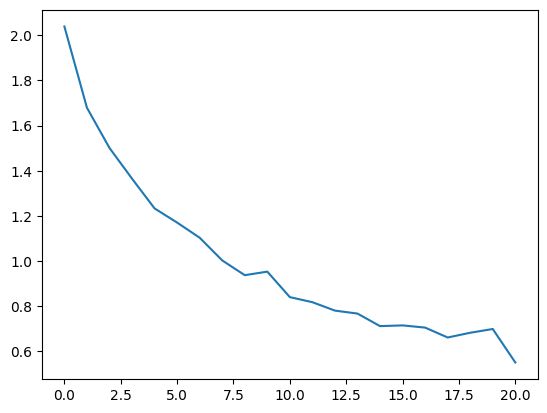

In [78]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)

/tmp/ipykernel_37844/2588306918.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + all_categories, rotation=90)
/tmp/ipykernel_37844/2588306918.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + all_categories)


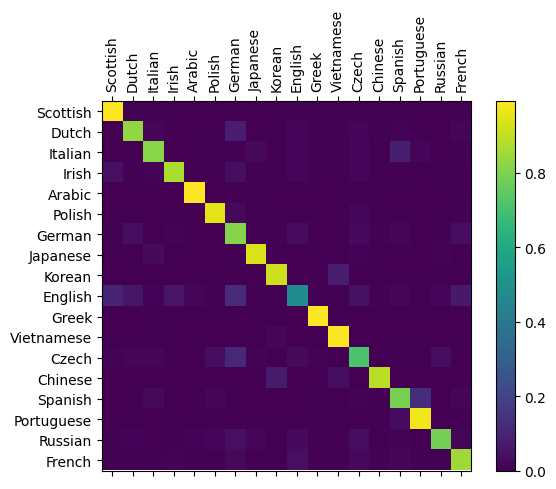

In [79]:
import matplotlib.ticker as ticker

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000
softmax = nn.LogSoftmax(dim=1)

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, input_ids = randomTrainingExample()
    
    hidden = rnn.initHidden().to(device)
    input_ids = input_ids.to(device)
    output, hidden = rnn(input_ids, hidden)
    guess, guess_i = categoryFromOutput(softmax(output))
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()